In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Comprehensive rcParams for publication-ready neurips paper - SET ONCE
plt.rcParams.update({
    'font.size': 24,
    'axes.labelsize': 28,
    'axes.titlesize': 30,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 22,
    'lines.linewidth': 3,
    'lines.markersize': 12,
    'lines.markeredgewidth': 2.5,
    'legend.frameon': False,
    'figure.dpi': 300,
    'font.weight': 'normal',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'grid.alpha': 0.3,
    'grid.linewidth': 1,
    'figure.figsize': (20, 6),
    'axes.grid': True,
})

print("Consistent matplotlib style applied for publication-ready plots")


Consistent matplotlib style applied for publication-ready plots


Total grids: 119
Using 119 dataset parts
Validation chunk IDs: [7, 30, 56, 59, 93, 106, 110, 24]
Validation grids: 8
Training grids: 108 (truncated from 111 for 4 GPU divisibility)
Ignored grids: 3 (original truncation + GPU alignment)


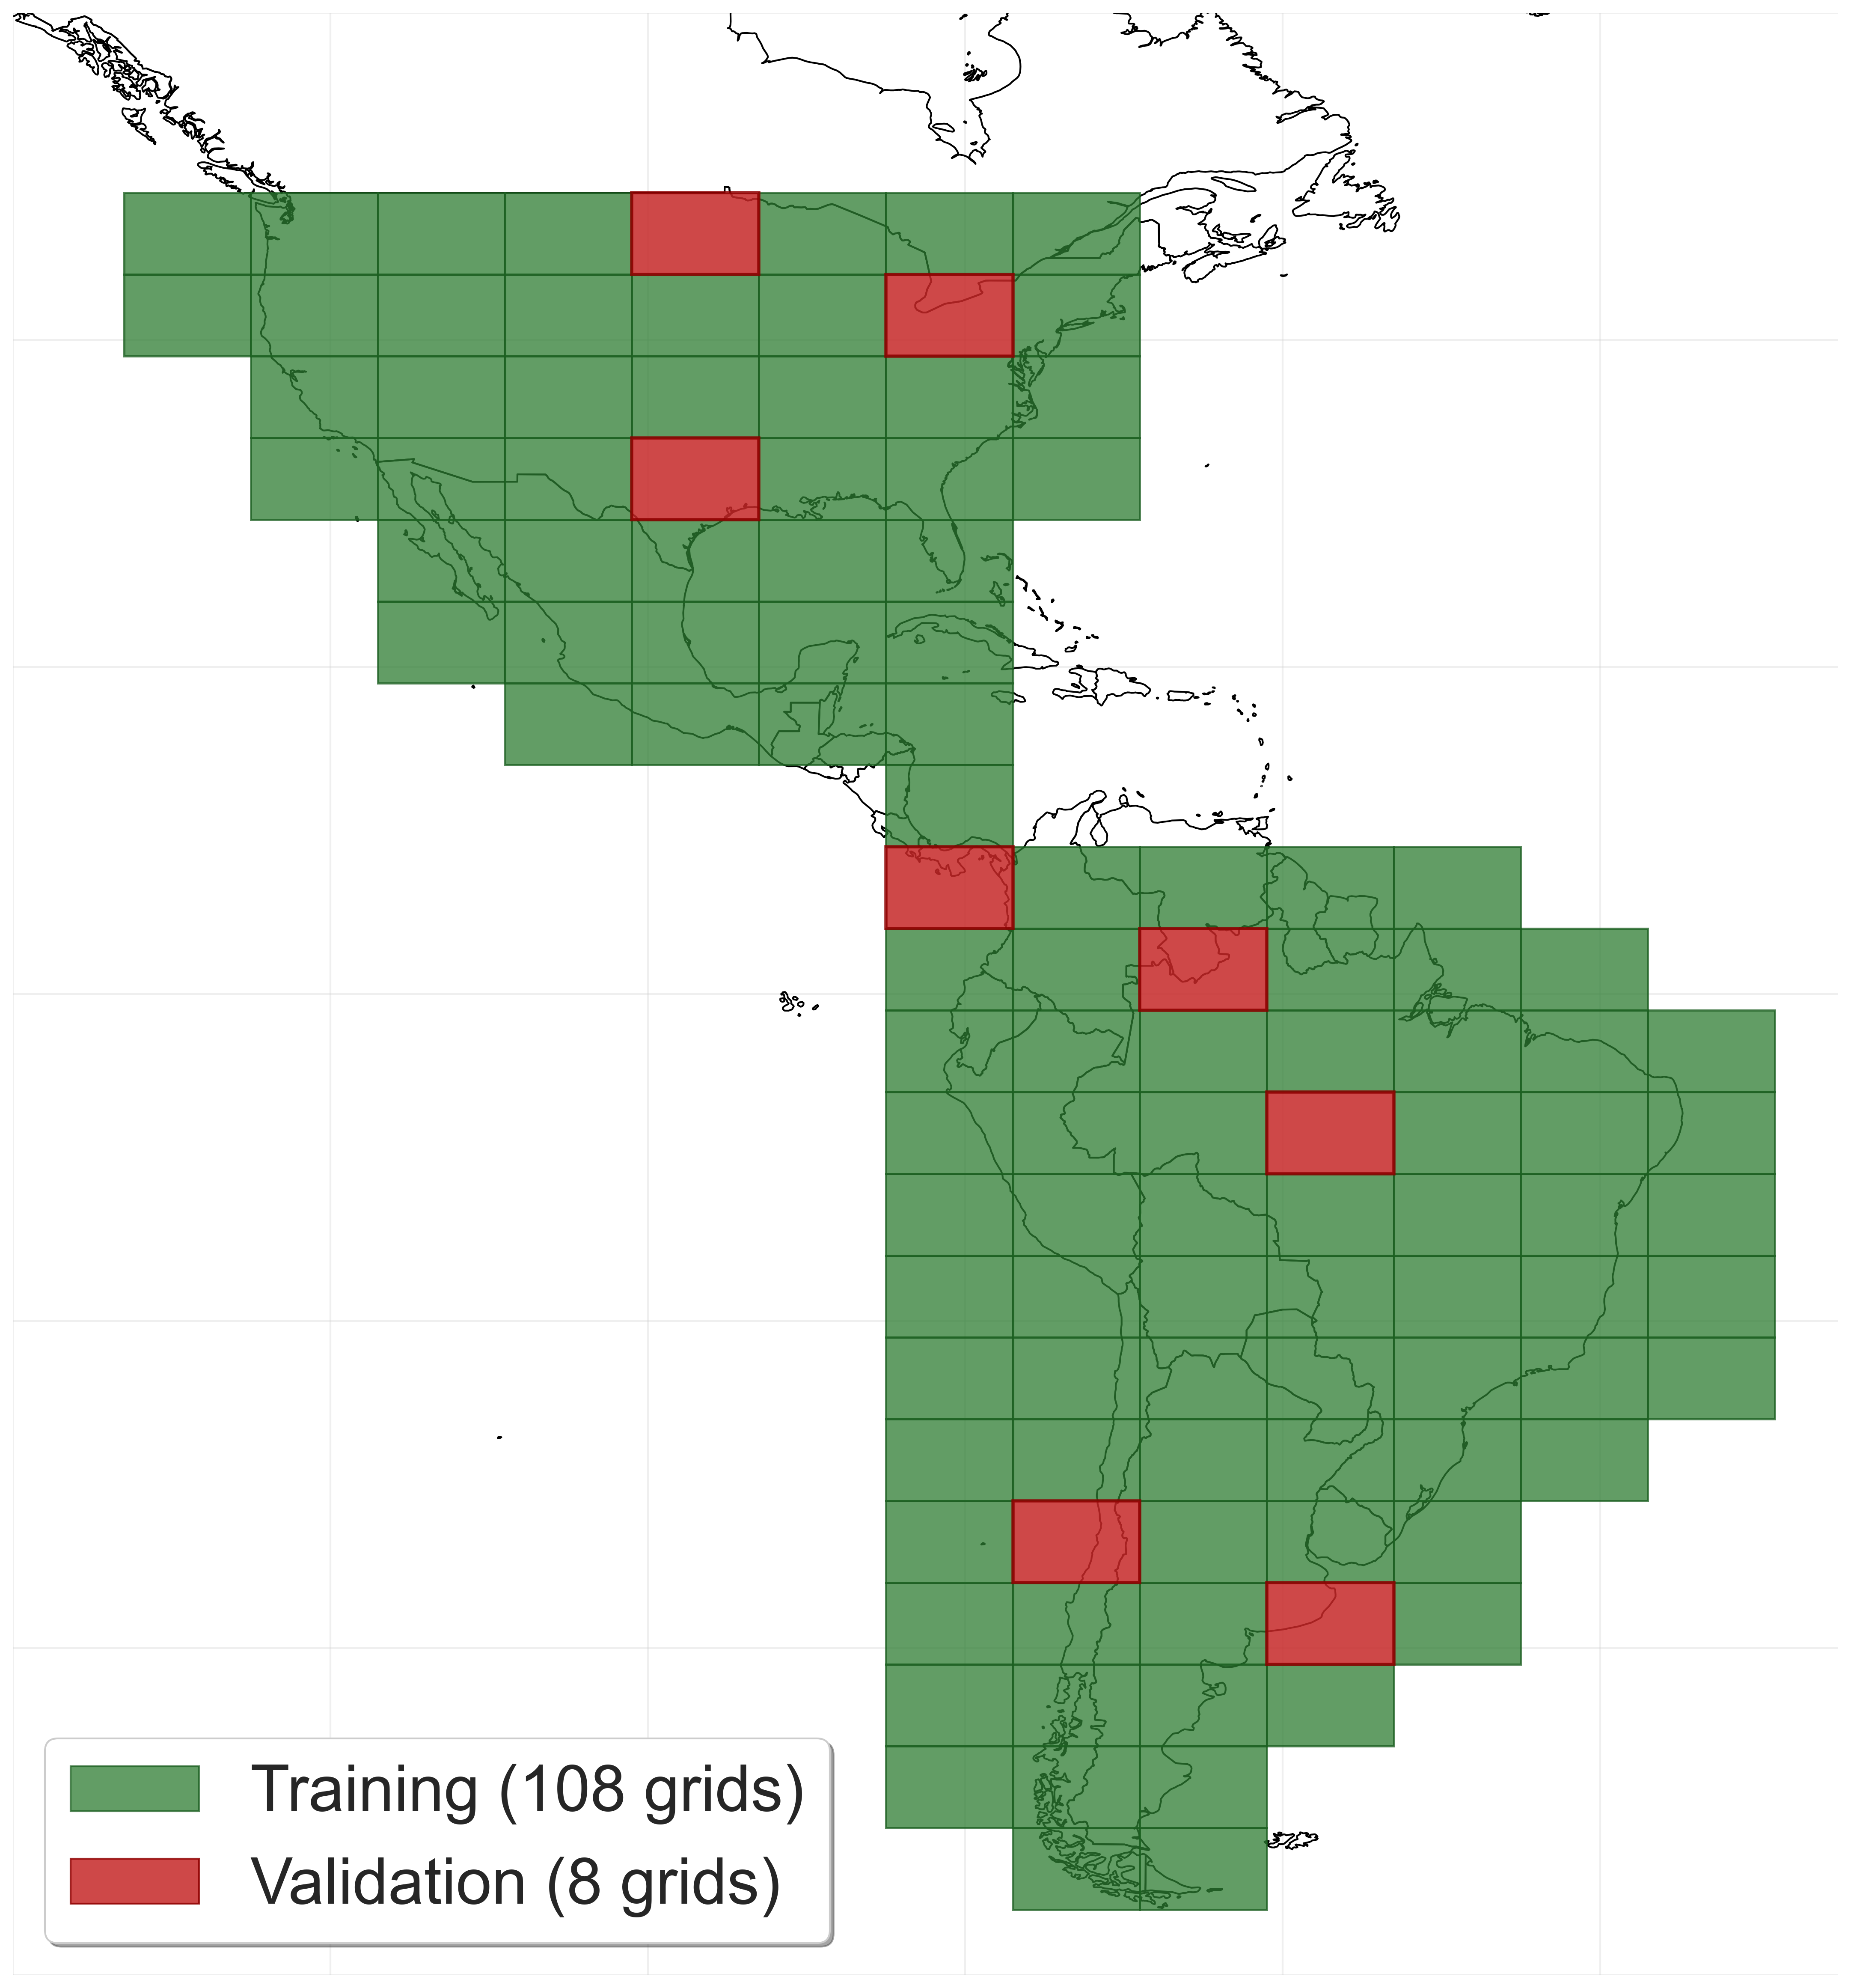

Plot saved as '../data/latex/img/weather_grid_map.pdf'


In [23]:
import numpy as np
import pandas as pd
import geopandas as gpd
import ssl
import urllib.request
import os
import sys
from matplotlib.patches import Rectangle

# Add src to path to import constants
sys.path.append('../')
from src.utils.constants import VALIDATION_CHUNK_IDS, NUM_DATASET_PARTS

# Handle SSL
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE
opener = urllib.request.build_opener(urllib.request.HTTPSHandler(context=ssl_context))
urllib.request.install_opener(opener)

# Grid coordinates from grids.py
GRID = {
    "USA": [
        ((29, -109), (24, -101)), ((29, -101), (24, -93)), ((29, -93), (24, -85)), ((29, -85), (24, -77)),
        ((34, -125), (29, -117)), ((34, -117), (29, -109)), ((34, -109), (29, -101)), ((34, -101), (29, -93)),
        ((34, -93), (29, -85)), ((34, -85), (29, -77)), ((34, -77), (29, -69)), ((39, -125), (34, -117)),
        ((39, -117), (34, -109)), ((39, -109), (34, -101)), ((39, -101), (34, -93)), ((39, -93), (34, -85)),
        ((39, -85), (34, -77)), ((39, -77), (34, -69)), ((44, -133), (39, -125)), ((44, -125), (39, -117)),
        ((44, -117), (39, -109)), ((44, -109), (39, -101)), ((44, -101), (39, -93)), ((44, -93), (39, -85)),
        ((44, -85), (39, -77)), ((44, -77), (39, -69)), ((49, -133), (44, -125)), ((49, -125), (44, -117)),
        ((49, -117), (44, -109)), ((49, -109), (44, -101)), ((49, -101), (44, -93)), ((49, -93), (44, -85)),
        ((49, -85), (44, -77)), ((49, -77), (44, -69)),
    ],
    "CENTRALAMERICA": [
        ((29, -117), (24, -109)), ((24, -117), (19, -109)), ((24, -109), (19, -101)), ((24, -101), (19, -93)),
        ((24, -93), (19, -85)), ((24, -85), (19, -77)), ((19, -109), (14, -101)), ((19, -101), (14, -93)),
        ((19, -93), (14, -85)), ((19, -85), (14, -77)),
    ],
    "SOUTHAMERICA": [
        ((-51, -77), (-56, -69)), ((-51, -69), (-56, -61)), ((-46, -85), (-51, -77)), ((-46, -77), (-51, -69)),
        ((-46, -69), (-51, -61)), ((-41, -85), (-46, -77)), ((-41, -77), (-46, -69)), ((-41, -69), (-46, -61)),
        ((-41, -61), (-46, -53)), ((-36, -85), (-41, -77)), ((-36, -77), (-41, -69)), ((-36, -69), (-41, -61)),
        ((-36, -61), (-41, -53)), ((-36, -53), (-41, -45)), ((-31, -85), (-36, -77)), ((-31, -77), (-36, -69)),
        ((-31, -69), (-36, -61)), ((-31, -61), (-36, -53)), ((-31, -53), (-36, -45)), ((-26, -85), (-31, -77)),
        ((-26, -77), (-31, -69)), ((-26, -69), (-31, -61)), ((-26, -61), (-31, -53)), ((-26, -53), (-31, -45)),
        ((-26, -45), (-31, -37)), ((-21, -85), (-26, -77)), ((-21, -77), (-26, -69)), ((-21, -69), (-26, -61)),
        ((-21, -61), (-26, -53)), ((-21, -53), (-26, -45)), ((-21, -45), (-26, -37)), ((-21, -37), (-26, -29)),
        ((-16, -85), (-21, -77)), ((-16, -77), (-21, -69)), ((-16, -69), (-21, -61)), ((-16, -61), (-21, -53)),
        ((-16, -53), (-21, -45)), ((-16, -45), (-21, -37)), ((-16, -37), (-21, -29)), ((-11, -85), (-16, -77)),
        ((-11, -77), (-16, -69)), ((-11, -69), (-16, -61)), ((-11, -61), (-16, -53)), ((-11, -53), (-16, -45)),
        ((-11, -45), (-16, -37)), ((-11, -37), (-16, -29)), ((-6, -85), (-11, -77)), ((-6, -77), (-11, -69)),
        ((-6, -69), (-11, -61)), ((-6, -61), (-11, -53)), ((-6, -53), (-11, -45)), ((-6, -45), (-11, -37)),
        ((-6, -37), (-11, -29)), ((-1, -85), (-6, -77)), ((-1, -77), (-6, -69)), ((-1, -69), (-6, -61)),
        ((-1, -61), (-6, -53)), ((-1, -53), (-6, -45)), ((-1, -45), (-6, -37)), ((-1, -37), (-6, -29)),
        ((4, -85), (-1, -77)), ((4, -77), (-1, -69)), ((4, -69), (-1, -61)), ((4, -61), (-1, -53)),
        ((4, -53), (-1, -45)), ((4, -45), (-1, -37)), ((9, -85), (4, -77)), ((9, -77), (4, -69)),
        ((9, -69), (4, -61)), ((9, -61), (4, -53)), ((9, -53), (4, -45)), ((14, -85), (9, -77)),
        ((14, -77), (9, -69)), ((14, -69), (9, -61)), ((14, -61), (9, -53)),
    ],
}

# Flatten all grids and get both center coordinates and full rectangle bounds
all_grids = []
grid_rectangles = []
for region, coords_list in GRID.items():
    for coords in coords_list:
        # coords format: ((lat_max, lon_min), (lat_min, lon_max))
        lat_max, lon_min = coords[0]
        lat_min, lon_max = coords[1]
        
        lat_center = (lat_max + lat_min) / 2
        lon_center = (lon_min + lon_max) / 2
        
        all_grids.append((lat_center, lon_center))
        # Store rectangle bounds: (lon_min, lat_min, width, height)
        width = lon_max - lon_min
        height = lat_max - lat_min
        grid_rectangles.append((lon_min, lat_min, width, height))

# Use actual validation chunk IDs from constants
print(f"Total grids: {len(all_grids)}")
print(f"Using {NUM_DATASET_PARTS} dataset parts")
print(f"Validation chunk IDs: {VALIDATION_CHUNK_IDS}")

# Only use the first NUM_DATASET_PARTS grids (119 total)
usable_grids = all_grids[:NUM_DATASET_PARTS]
usable_rectangles = grid_rectangles[:NUM_DATASET_PARTS]

# Create validation and training grids based on actual chunk IDs
val_grids = []
val_rectangles = []
potential_train_grids = []
potential_train_rectangles = []

for i in range(len(usable_grids)):
    if i in VALIDATION_CHUNK_IDS:
        val_grids.append(usable_grids[i])
        val_rectangles.append(usable_rectangles[i])
    else:
        potential_train_grids.append(usable_grids[i])
        potential_train_rectangles.append(usable_rectangles[i])

# Apply GPU divisibility logic (truncate to be divisible by 4 GPUs)
world_size = 4  # Number of GPUs
num_chunks_per_gpu = len(potential_train_grids) // world_size
total_train_chunks_to_use = num_chunks_per_gpu * world_size

# Truncate training grids to be evenly divisible
train_grids = potential_train_grids[:total_train_chunks_to_use]
train_rectangles = potential_train_rectangles[:total_train_chunks_to_use]

# Calculate actual ignored grids
total_ignored = len(all_grids) - NUM_DATASET_PARTS + (len(potential_train_grids) - len(train_grids))

print(f"Validation grids: {len(val_grids)}")
print(f"Training grids: {len(train_grids)} (truncated from {len(potential_train_grids)} for {world_size} GPU divisibility)")
print(f"Ignored grids: {total_ignored} (original truncation + GPU alignment)")

# Download continent borders
continents = gpd.read_file("https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip")
americas_gdf = continents[continents['CONTINENT'].isin(['North America', 'South America'])]

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

# Plot Americas countries with blank fill and black borders
americas_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=1.0, alpha=1.0)

# Professional academic color scheme - green/red
train_color = '#2D7D32'      # Professional forest green
train_edge_color = '#1B5E20' # Darker green edge
val_color = '#C62828'        # Professional crimson red
val_edge_color = '#8E0000'   # Darker red edge

# Plot training grid rectangles first (professional green, lower layer)
for lon_min, lat_min, width, height in train_rectangles:
    rect = Rectangle((lon_min, lat_min), width, height, 
                    facecolor=train_color, edgecolor=train_edge_color, 
                    alpha=0.75, linewidth=1.2, zorder=2)
    ax.add_patch(rect)

# Plot validation grid rectangles on top (professional red, higher layer)
for lon_min, lat_min, width, height in val_rectangles:
    rect = Rectangle((lon_min, lat_min), width, height, 
                    facecolor=val_color, edgecolor=val_edge_color, 
                    alpha=0.85, linewidth=1.8, zorder=3)
    ax.add_patch(rect)

# Set map bounds to show Americas
ax.set_xlim(-140, -25)
ax.set_ylim(-60, 60)

# Create custom legend handles
from matplotlib.patches import Patch
train_patch = Patch(facecolor=train_color, edgecolor=train_edge_color, alpha=0.75, label=f'Training ({len(train_grids)} grids)')
val_patch = Patch(facecolor=val_color, edgecolor=val_edge_color, alpha=0.85, label=f'Validation ({len(val_grids)} grids)')

# Add legend (no title)
ax.legend(handles=[train_patch, val_patch], loc='lower left', fontsize=36, frameon=True, fancybox=True, shadow=True)

# Remove axis labels and ticks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Create output directory if it doesn't exist
os.makedirs('../data/latex/img', exist_ok=True)

plt.tight_layout()
plt.savefig('../data/latex/img/weather_grid_map.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("Plot saved as '../data/latex/img/weather_grid_map.pdf'")
